In [1]:
# prerequisite package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

We'll continue working with the Pokémon dataset

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task**: Pokémon have a number of different statistics that describe their combat capabilities. Here, create a _histogram_ that depicts the distribution of 'special-defense' values taken. **Hint**: Try playing around with different bin width sizes to see what best depicts the data.

In [3]:
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


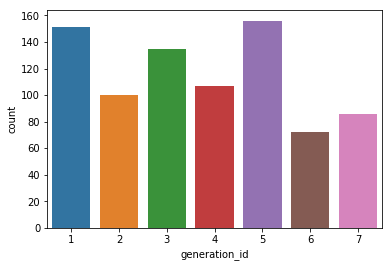

In [4]:
sb.countplot(data = pokemon,x = 'generation_id');

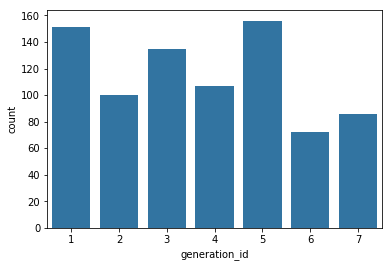

In [5]:
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon,x = 'generation_id', color = base_color);


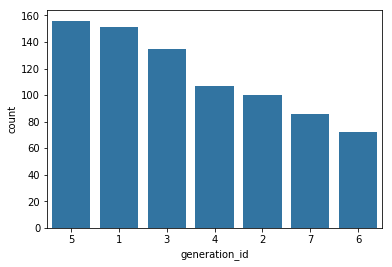

In [6]:
order_gen = pokemon['generation_id'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon,x = 'generation_id',color = base_color, order = order_gen );

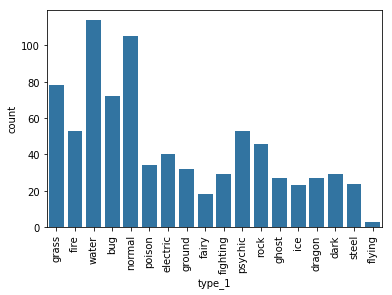

In [7]:
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon,x = 'type_1', color = base_color);
plt.xticks(rotation = 90);

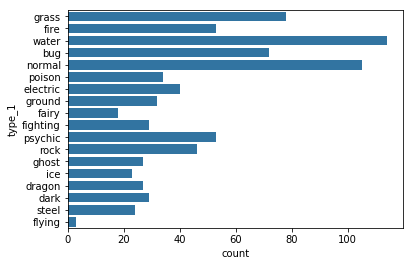

In [8]:
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon,y = 'type_1', color = base_color);

In [9]:
pkmn_types = pokemon.melt(id_vars = ['id','species'],
                        value_vars = ['type_1','type_2'],
                        var_name = 'type_level', value_name = 'type').dropna()
pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [18]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_count.index

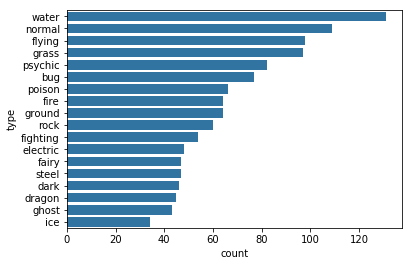

In [19]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y= 'type',color =base_color, order = type_order);

In [20]:
n_pokemon = pokemon.shape[0]
max_type_count = type_count[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


In [21]:
tick_prop = np.arange(0,max_prop,0.02)
tick_name = ['{:0.2f}'.format(v) for v in tick_prop]

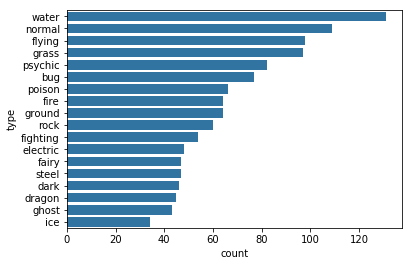

In [22]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

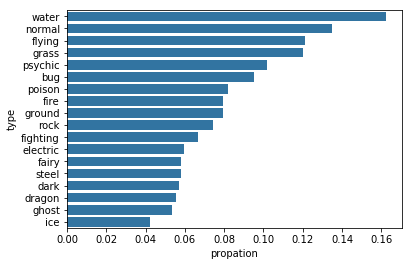

In [23]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y= 'type',color = base_color, order = type_order);
plt.xticks(tick_prop*n_pokemon,tick_name)
plt.xlabel('propation');

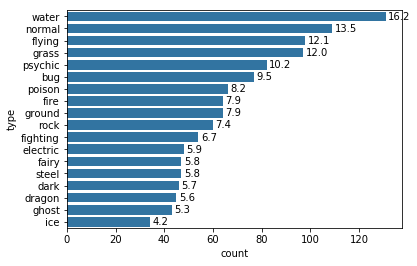

In [24]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y= 'type',color = base_color, order = type_order);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va = 'center')

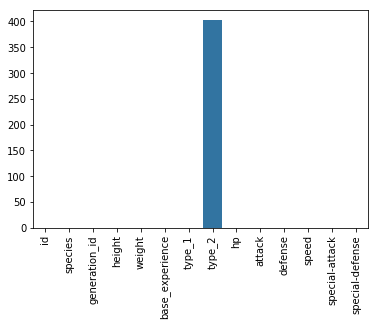

In [25]:
na_counts = pokemon.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation = 90);

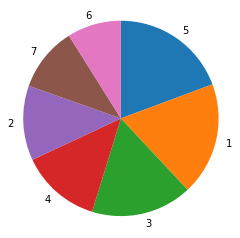

In [26]:
# code for the pie chart seen above
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');

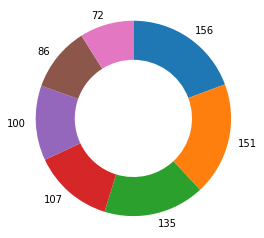

In [27]:
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

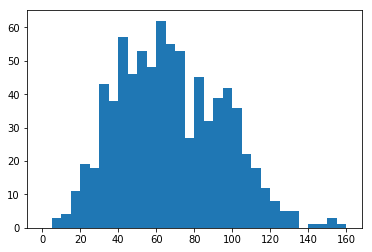

In [28]:
bins = np.arange(0,pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed',bins = bins);

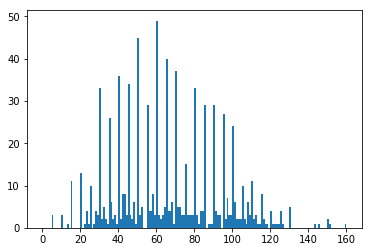

In [29]:
bins = np.arange(0,pokemon['speed'].max()+1, 1)
plt.hist(data = pokemon, x = 'speed',bins = bins);

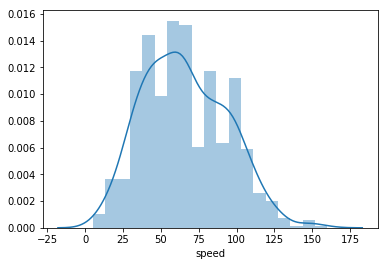

In [30]:
sb.distplot(pokemon['speed']);

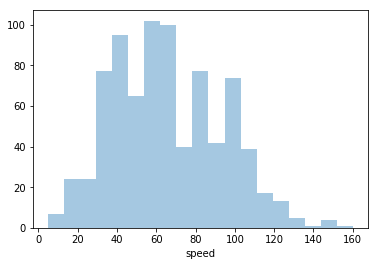

In [31]:
sb.distplot(pokemon['speed'], kde = False);

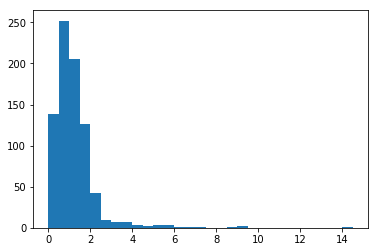

In [32]:
bins = np.arange(0,pokemon['height'].max()+0.5,0.5)
plt.hist(data = pokemon, x = 'height',bins = bins);

(0, 6)

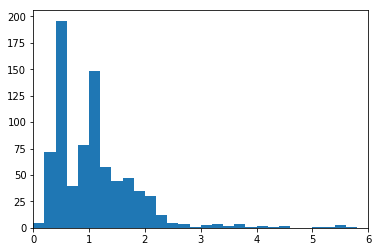

In [33]:
bins = np.arange(0,pokemon['height'].max()+0.2,0.2)
plt.hist(data = pokemon, x = 'height',bins = bins)
plt.xlim([0,6])

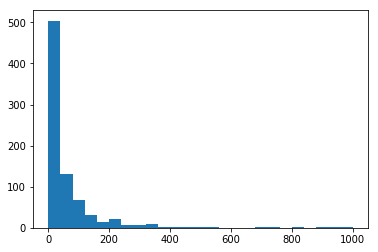

In [34]:
bins = np.arange(0,pokemon['weight'].max()+40,40)
plt.hist(data = pokemon, x =pokemon['weight'],bins = bins);

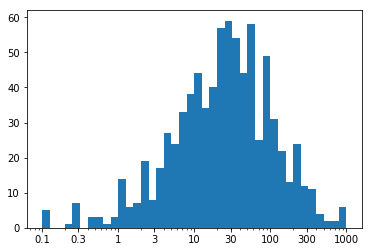

In [35]:
bins = 10 ** np.arange(-1,+3+0.1,0.1)
ticks = [0.1,0.3,1,3,10,30,100,300,1000]
label = ['{}'.format(v) for v in ticks]
plt.hist(data = pokemon, x =pokemon['weight'],bins = bins)
plt.xscale('log')
plt.xticks(ticks,label);

In [36]:
!pwd

/d/pandas_exercises-master/07_Visualization
